In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
from distribuciones import espirales_anidadas, diagonal, paralelo
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree

# EJERCICIO 1

In [2]:
df0 = espirales_anidadas(150).drop(['r','tita'],axis=1)
y0 = df0['clases']
X0 = df0.drop(['clases'],axis = 1)

df1 = espirales_anidadas(600).drop(['r','tita'],axis=1)
y1 = df1['clases']
X1 = df1.drop(['clases'],axis = 1)

df2 = espirales_anidadas(3000).drop(['r','tita'],axis=1)
y2 = df2['clases']
X2 = df2.drop(['clases'],axis = 1)

clf0 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf0.fit(X0.values, y0.values)

clf1 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf1.fit(X1.values, y1.values)

clf2 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf2.fit(X2.values, y2.values)

### TEST ###

df_test = espirales_anidadas(10000).drop(['r','tita'],axis=1)
y_test = df_test['clases']
X_test = df_test.drop(['clases'],axis = 1)

y_predict0 = clf0.predict(X_test.values)
y_predict1 = clf1.predict(X_test.values)
y_predict2 = clf2.predict(X_test.values)

sel0, = np.where(y_predict0 == y_test.values)
sel1, = np.where(y_predict1 == y_test.values)
sel2, = np.where(y_predict2 == y_test.values)

print(len(sel0)/10000, len(sel1)/10000, len(sel2)/10000)

0.6598 0.8288 0.8829


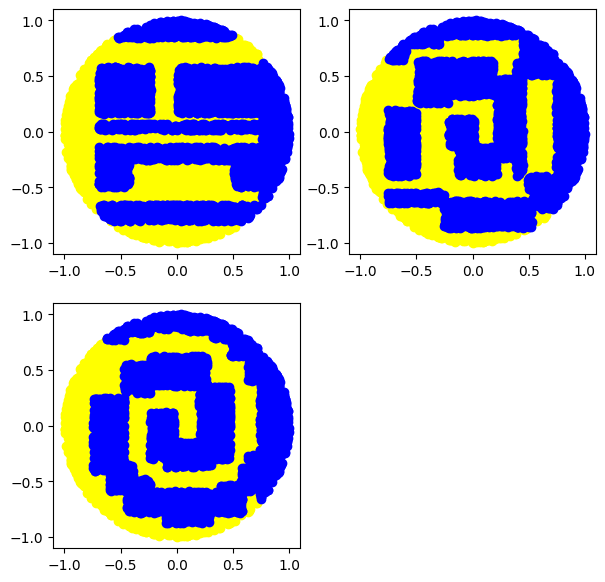

In [3]:
plt.figure(figsize=(7,7))

plt.subplot(221)
c0, = np.where(y_predict0 == 0)
c1, = np.where(y_predict0 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(222)
c0, = np.where(y_predict1 == 0)
c1, = np.where(y_predict1 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(223)
c0, = np.where(y_predict2 == 0)
c1, = np.where(y_predict2 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

<span style="color:green;">
   
Los porcentajes de clasificaciones correctas de las 3 espirales son 70, 83 y 88 % respectivamente. Para el ultimo caso (el de el arbol entrenado con 3000 datos) se observa que al clasificar el conjunto de test, se recupera la forma de la espiral, aunque no de una manera "suave" como es el caso original. Se puede observar como la clasificacion que realiza el arbol se hace realizando cortes en X e Y.
    
</span>

# EJERCICIO 2

In [4]:
#  Genere un único conjunto de test con n = 10000.
d = 2
C = 0.78
testdiag = diagonal(d,10000,C)
testpara = paralelo(d,10000,C)

In [5]:
# Genere 20 conjuntos de entrenamiento para 
# cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000.
# Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) 
# sobre los datos de entrenamiento y sobre el conjunto de test, como así también 
# el tamaño del árbol (atributo tree_.node_count).

N = [125, 250, 500, 1000, 2000, 4000]

#N = [12, 50, 100, 200, 500, 1000]

error_training = [[],[],[],[],[],[]]
error_test = [[],[],[],[],[],[]]
size = [[],[],[],[],[],[]]

X_plot = [[],[],[],[],[],[]]
y_plot = [[],[],[],[],[],[]]
y_test = []

for i in range(20):
    
    k = 0
    for n in N:
        
        # ----------------------  diagonal   ---------------
        dtrain = diagonal(d,n,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k].append(1 - accuracy)
        
        
        test = testdiag.drop(['clases'],axis = 1).values
        
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k].append(1 - accuracy)
        size[k].append(clf.tree_.node_count)
                   
        if i==1:
            X_plot[k].append(test)
            y_plot[k].append(prediccion_test)
            #y_test.append(prediccion_test)
            
            
        
        k = k + 1

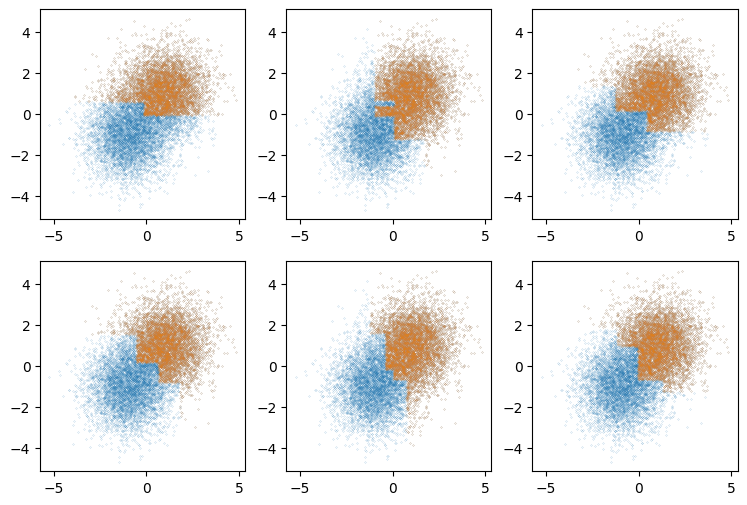

In [6]:
markersize= .1

plt.figure(figsize=(9,6))

plt.subplot(231)
c1, = np.where(y_plot[0][0]==1)
plt.plot(X_plot[0][0][:,0],X_plot[0][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[0][0][c1,0],X_plot[0][0][c1,1],ls='none',marker='o',markersize=markersize)

plt.subplot(232)
c1, = np.where(y_plot[1][0]==1)
plt.plot(X_plot[1][0][:,0],X_plot[1][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[1][0][c1,0],X_plot[1][0][c1,1],ls='none',marker='o',markersize=markersize)

plt.subplot(233)
c1, = np.where(y_plot[2][0]==1)
plt.plot(X_plot[2][0][:,0],X_plot[2][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[2][0][c1,0],X_plot[2][0][c1,1],ls='none',marker='o',markersize=markersize)

plt.subplot(234)
c1, = np.where(y_plot[3][0]==1)
plt.plot(X_plot[3][0][:,0],X_plot[3][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[3][0][c1,0],X_plot[3][0][c1,1],ls='none',marker='o',markersize=markersize)

plt.subplot(235)
c1, = np.where(y_plot[4][0]==1)
plt.plot(X_plot[4][0][:,0],X_plot[4][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[4][0][c1,0],X_plot[4][0][c1,1],ls='none',marker='o',markersize=markersize)

plt.subplot(236)
c1, = np.where(y_plot[5][0]==1)
plt.plot(X_plot[5][0][:,0],X_plot[5][0][:,1],ls='none',marker='o',markersize=markersize)
plt.plot(X_plot[5][0][c1,0],X_plot[5][0][c1,1],ls='none',marker='o',markersize=markersize)


<span style="color:green;">
Se puede ver como los primeros arboles tienen cortes mas "especificos", en el sentido de que hay cuadrados o lineas de seleccion de puntos de alguna clase que son demasiado especificos para los datos con los que fue entrenado. Los arboles de abajo generaron una clasificacion "mas suave". 
</span>

In [7]:
error_mean_training_d = []
for distribucion in error_training:
    error_mean_training_d.append(np.mean(distribucion))

error_mean_test_d = []
for distribucion in error_test:
    error_mean_test_d.append(np.mean(distribucion))  

size_mean_d = []
for distribucion in size:
    size_mean_d.append(np.mean(distribucion))

In [8]:
N = [125, 250, 500, 1000, 2000, 4000]

error_training = [[],[],[],[],[],[]]
error_test = [[],[],[],[],[],[]]
size = [[],[],[],[],[],[]]

X_plot = []
y_plot = []
y_test = []

for i in range(20):
    
    k = 0
    for n in N:
        
        # ----------------------  diagonal   ---------------
        dtrain = paralelo(d,n,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k].append(1 - accuracy)
        
        
        test = testpara.drop(['clases'],axis = 1).values
        
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k].append(1 - accuracy)
        size[k].append(clf.tree_.node_count)
                   
        if i==19:
            X_plot.append(test)
            y_plot.append(prediccion_test)
            #y_test.append(prediccion_test)
            
            
        
        k = k + 1

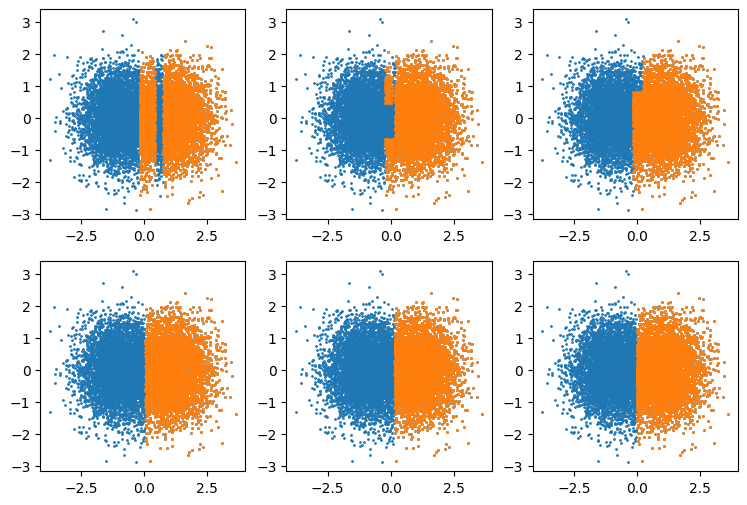

In [9]:
plt.figure(figsize=(9,6))

plt.subplot(231)
c1, = np.where(y_plot[0]==1)
plt.plot(X_plot[0][:,0],X_plot[0][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[0][c1,0],X_plot[0][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(232)
c1, = np.where(y_plot[1]==1)
plt.plot(X_plot[1][:,0],X_plot[1][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[1][c1,0],X_plot[1][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(233)
c1, = np.where(y_plot[2]==1)
plt.plot(X_plot[2][:,0],X_plot[2][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[2][c1,0],X_plot[2][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(234)
c1, = np.where(y_plot[3]==1)
plt.plot(X_plot[3][:,0],X_plot[3][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[3][c1,0],X_plot[3][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(235)
c1, = np.where(y_plot[4]==1)
plt.plot(X_plot[4][:,0],X_plot[4][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[4][c1,0],X_plot[4][c1,1],ls='none',marker='o',markersize=1)

plt.subplot(236)
c1, = np.where(y_plot[5]==1)
plt.plot(X_plot[5][:,0],X_plot[5][:,1],ls='none',marker='o',markersize=1)
plt.plot(X_plot[5][c1,0],X_plot[5][c1,1],ls='none',marker='o',markersize=1)


<span style="color:green;">
    Cualitativamente el comportamiento es similar al caso de los datos "diagonal". Tenemos comportamientos similares y "suaves" para las clasificaciones de los paneles inferiores y clasificaciones que sugieren sobreajuste en los paneles superiores.
</span>

In [10]:
error_mean_training_p = []
for distribucion in error_training:
    error_mean_training_p.append(np.mean(distribucion))

error_mean_test_p = []
for distribucion in error_test:
    error_mean_test_p.append(np.mean(distribucion))
    
size_mean_p = []
for distribucion in size:
    size_mean_p.append(np.mean(distribucion))

Text(0, 0.5, 'size')

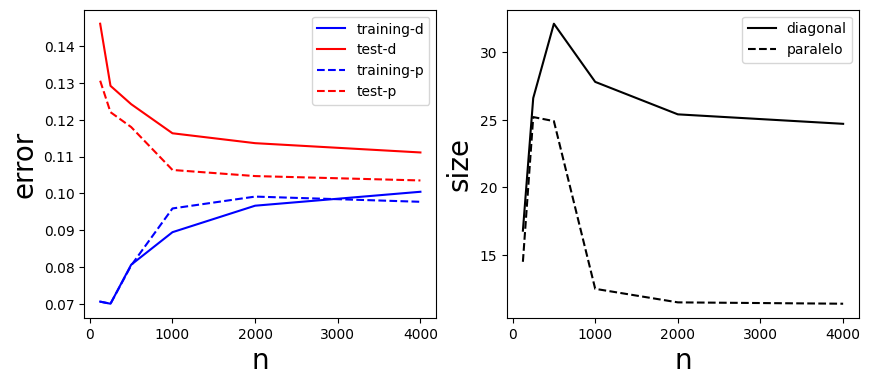

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(N,error_mean_training_d,label='training-d',color='blue')
plt.plot(N,error_mean_test_d,label='test-d',color='red')

plt.plot(N,error_mean_training_p,label='training-p',ls='--',color='blue')
plt.plot(N,error_mean_test_p,label='test-p',ls='--',color='red')

#plt.semilogx()
plt.legend()
#plt.semilogy()
plt.xlabel('n',size=20)
plt.ylabel('error',size=20)

plt.subplot(122)
plt.plot(N,size_mean_d,color='black',label='diagonal')
plt.plot(N,size_mean_p,color='black',ls='--',label='paralelo')
#plt.semilogx()
plt.legend()
plt.xlabel('n',size=20)
plt.ylabel('size',size=20)

<span style="color:green;">
    En la figura izquierda tenemos el error obtenido para arboles entrenados con diferente numero de puntos (n). Con linea continua tenemos el set de datos "diagonal" y con dashed el "paralelo".  Se puede observar como el error de entrenamiento y de test se estabilizan con un error cercano a ~10% (~12 %) para arboles entrenados con ~2000 puntos para el set diagonal (paralelo). A la derecha tenemos el tamaño del arbol (numero de nodos) en funcion de n. Se observa que para ~500 puntos tenemos los arboles mas grande y luego empieza a disminuir el tamaño hasta estabilizarse para 2000 puntos. Para los parametros elegidos para la construcciones de los arboles tenemos entonces que entrenar con ~2000 puntos es suficiente. 
    La comparacion entre ambos sets arroja mayores errores para el set de datos "paralelo" el cual asocio a un mayor area de superposicion de los datos de las gaussanas que conforman los sets y clases. Dicho de otra manera, las gauseanas en la distribucion "diagonal" se separan en dos dimension (x e y), mientras que en el caso "paralelo" solo se separan en una dimension (x) de modo que es mas facil clasificar en el caso diagonal.
</span>

# EJERCICIO 3

In [12]:
d = 4
n_train = 250
n_test  = 10000
C_values = np.linspace(0.5,2.5,5)
trainingsets = 20
print(C_values)

[0.5 1.  1.5 2.  2.5]


In [13]:
error_training = np.zeros([len(C_values),trainingsets])
error_test = np.zeros([len(C_values),trainingsets])

k = 0 
for C in C_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1

error_mean_training_d = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_training_d[i] = np.mean(error_training[i,:])

error_mean_test_d = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_test_d[i] = np.mean(error_test[i,:])

In [14]:
error_training = np.zeros([len(C_values),trainingsets])
error_test = np.zeros([len(C_values),trainingsets])

k = 0 
for C in C_values:
    
    testdiag = paralelo(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = paralelo(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1

error_mean_training_p = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_training_p[i] = np.mean(error_training[i,:])

error_mean_test_p = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_test_p[i] = np.mean(error_test[i,:])   

## Opcional

<span style="color:green;">
    Teniendo en cuenta la simetria de las funciones gausseanas que generan las distribuciones diagonal y paralela, un buen clasificar puede ser uno que asigne a cada punto la gauseana mas cercana.
</span>

In [15]:
from scipy.stats import multivariate_normal
import random

def generate_random_number(A, B):

    #Genera un número aleatorio que puede ser 1 con una probabilidad A y 0 con una probabilidad B.
    
    r = random.random()  # Genera un número aleatorio entre 0 y 1
    
    if r < A:
        return 1
    else:
        return 0

def diagonal_teorica(x,d,C):

    center0 = np.ones(d)*-1
    mcov0   = np.eye(d)*C*np.sqrt(d)
    gaussian0 = multivariate_normal.pdf(x, mean=center0, cov=mcov0)

    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    gaussian1 = multivariate_normal.pdf(x, mean=center1, cov=mcov1)

    p0 = gaussian0/(gaussian0 + gaussian1)
    p1 = gaussian1/(gaussian0 + gaussian1)
    
    clase = generate_random_number(p1,p0)
    return clase   

In [16]:
def diagonal_cercana(x,d):
    center0 = np.ones(d)*-1
    center1 = np.ones(d)
    
    d0 = np.linalg.norm(x - center0)
    d1 = np.linalg.norm(x - center1)
    
    if d0<d1:
        return 0
    if d0>d1:
        return 1
    if d0 == d1:
        random_number = random.choice([0, 1])
        return random_number
    
def paralelo_cercana(x,d):
    
    center0 = np.zeros(d)
    center0[0] = -1
    
    center1 = np.zeros(d)
    center1[0] = 1
    
    d0 = np.linalg.norm(x - center0)
    d1 = np.linalg.norm(x - center1)
    
    if d0<d1:
        return 0
    if d0>d1:
        return 1
    if d0 == d1:
        random_number = random.choice([0, 1])
        return random_number

In [17]:
error_bayes_d = np.zeros(len(C_values))

k = 0 
for C in C_values:
    
    testdiag = diagonal(d,10000,C)
    
    y = testdiag['clases'].values
    X = testdiag.drop(['clases'],axis = 1).values

    prediccion_bayes = []
    for i in range(len(X)):
        prediccion_bayes.append(diagonal_cercana(X[i,:],d))
    
    prediccion_bayes = np.array(prediccion_bayes)
    correctos, = np.where(prediccion_bayes == y)
    accuracy = len(correctos)/len(y)
    error_bayes_d[k] = 1 - accuracy
        
    k = k + 1
    
error_bayes_p = np.zeros(len(C_values))

k = 0 
for C in C_values:
    
    testpara = paralelo(d,10000,C)
    
    y = testpara['clases'].values
    X = testpara.drop(['clases'],axis = 1).values

    prediccion_bayes = []
    for i in range(len(X)):
        prediccion_bayes.append(paralelo_cercana(X[i,:],d))
    
    prediccion_bayes = np.array(prediccion_bayes)
    correctos, = np.where(prediccion_bayes == y)
    accuracy = len(correctos)/len(y)
    error_bayes_p[k] = 1 - accuracy
        
    k = k + 1

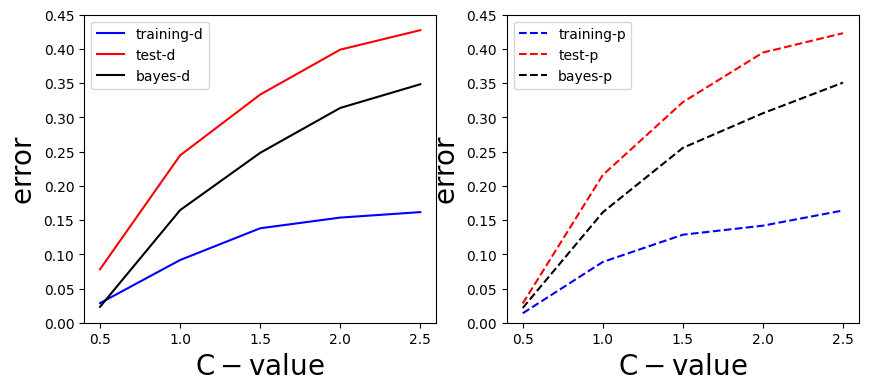

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(C_values,error_mean_training_d,label='training-d',color='blue')
plt.plot(C_values,error_mean_test_d,label='test-d',color='red')
plt.plot(C_values,error_bayes_d,label='bayes-d',color='black')
plt.xlabel('$\\rm C-value$',size=20)
plt.ylabel('$\\rm error$',size=20)
plt.legend()
plt.ylim(0,0.45)

plt.subplot(122)
plt.plot(C_values,error_mean_training_p,label='training-p',ls='--',color='blue')
plt.plot(C_values,error_mean_test_p,label='test-p',ls='--',color='red')
plt.plot(C_values,error_bayes_p,label='bayes-p',ls='--',color='black')
plt.xlabel('$\\rm C-value$',size=20)
plt.ylabel('$\\rm error$',size=20)
plt.ylim(0,0.45)
plt.legend()

<span style="color:green;">

A mayor C-value quiere decir que tendremos mayor dispersion en las gausseanas que producen nuestros datos, es decir estas gauseanas seran "mas anchas" de modo que tendremos mayor superposicion de puntos de clase 1 y clase 0. Esto último es lo que produce que a mayores valores de C tendremos mayores errores. Respecto a las diferencias de "paralelo" y "diagonal" encontramos menores errores en este ultimo caso, debido a que tambien el "conjunto de superposicion es menor". Con esto ultimo me refiero a que el conjunto paralelo solo esta separado en una dimension, ya que los centros de las gauseanas son (-1,0,0,0) y (1,0,0,0) mientras que en diagonal la separacion es en las 4 dimensiones (centros en (1,1,1,1) y (-1,-1,-1,-1) ).
    
El clasificador teorico utilizado asigna cada punto a el centro de gauseana mas cercano, la simetría de las gauseanas nos permite asignar de esta manera. Observamos que el clasificador teorico utilizado es mas certero que los arboles contruidos para ambos conjunto de datos. Esto es asi porque la asignacion se hace en funcion de la distancia radial al centro de las gauseanas, mientras que el arbol considera cortes en x e y, de modo que la clasificacion es mas compleja.

</span>

# EJERCICIO 4

In [20]:
C = 0.78
n_train = 250
n_test  = 10000
D_values = [2,4,8,16,32]
trainingsets = 20

In [21]:
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_d[i] = np.mean(error_training[i,:])

error_mean_test_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_d[i] = np.mean(error_test[i,:])

In [22]:
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testpara = paralelo(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = paralelo(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clf.fit(X, y)
        
        prediccion_training = clf.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testpara.drop(['clases'],axis = 1).values
        prediccion_test = clf.predict(test)
        correctos, = np.where(prediccion_test == testpara['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_p[i] = np.mean(error_training[i,:])

error_mean_test_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_p[i] = np.mean(error_test[i,:])

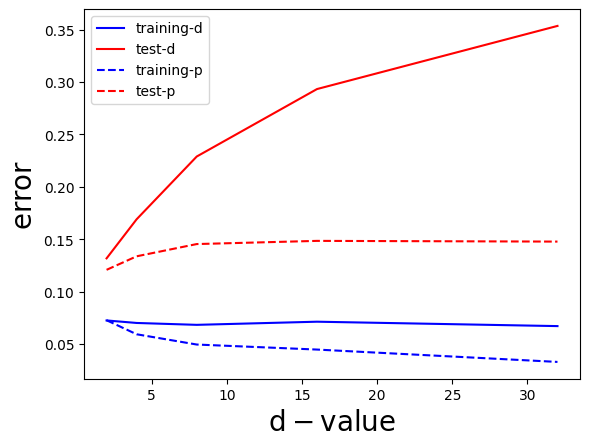

In [23]:
plt.plot(D_values,error_mean_training_d,label='training-d',color='blue')
plt.plot(D_values,error_mean_test_d,label='test-d',color='red')

plt.plot(D_values,error_mean_training_p,label='training-p',ls='--',color='blue')
plt.plot(D_values,error_mean_test_p,label='test-p',ls='--',color='red')

plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()

<span style="color:green;">
A diferencia de los casos anteriores, el dataset "diagonal" no siempre es clasificado con mas precision que el "paralelo" ya que vemos que para dimension mayores a ~15 el conjunto de test para el set diagonal tiene mayores errores que para el conjunto "paralelo". Este ultimo, parece funcionar con un error constante para dimensiones mayores a ~10 mientras que el "diagonal" parece aumentar su error continuamente. 
    El hecho de que para dimensiones mayores a ~15 el arbol clasifique mejor los datos paralelos que los diagonales llama mi atencion, ya que debido a que en el set diagonal las clases se separan en mas dimensiones que en los datos paralelos (por lo comentado en respuestas anteriores) yo esperaba que las clasificaciones sean siempre mas certeras en los datos diagonales. 
    
</span>

# EJERCICIO 5

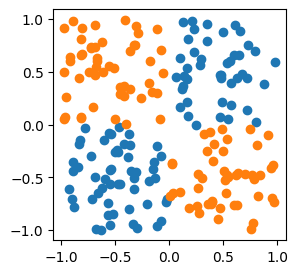

In [25]:
df = pd.read_csv('xor.csv')

c0, = np.where(df.iloc[:,2] == 0)
c1, = np.where(df.iloc[:,2] == 1)
plt.figure(figsize=(3,3))
plt.plot(df.iloc[c0,0],df.iloc[c0,1],ls='none',marker='o')
plt.plot(df.iloc[c1,0],df.iloc[c1,1],ls='none',marker='o')

In [28]:
y = df.iloc[:,2].values
X = df.iloc[:,0:2].values
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.03,
                       min_samples_leaf=5, random_state=0)

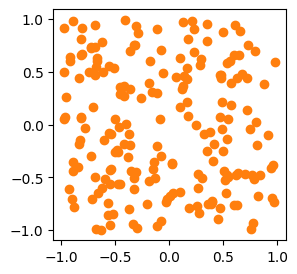

In [29]:
prediccion_training = clf.predict(X)

c0_t, = np.where(prediccion_training == 0)
c1_t, = np.where(prediccion_training == 1)
plt.figure(figsize=(3,3))
plt.plot(df.iloc[c0_t,0],df.iloc[c0_t,1],ls='none',marker='o')
plt.plot(df.iloc[c1_t,0],df.iloc[c1_t,1],ls='none',marker='o')

<span style="color:green;">

El C4.5 solamente agrega un nodo si la ganacia de informacion supera un cierto threshold. 
Si la ganancia de información calculada para un atributo es menor que la impureza mínima necesaria para la división, entonces la división no se realizará. De esta manera, el parámetro min_impurity_decrease actúa como una forma de controlar la ganancia de información al definir una impureza mínima que debe reducirse para que se produzca una división.

La primera particion del arbol (ej x=0) produce que haya igual numero de valores con clase 0 y 1 en cada nodo (por la simetria del problema) entonces si el min_impurity_decrease es grande (como es este caso) quiere decir que tiene que reducirse mucho la impureza para justificarse hacer una particion. En este caso, como partir en principio no mejora nada entonces no se hace nunca la particion.

</span>